<a href="https://colab.research.google.com/github/Aliahmadjangohar/Aliahmadjangohar/blob/main/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls /content/drive/MyDrive/data/image

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!7za -y x "/content/drive/MyDrive/data/image/origin.7z.*"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/data/image/                                            8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg                                      0% 9

In [ ]:
!mkdir "/content/drive/MyDrive/Extracted_data"
!cp -r ./origin "//content/drive/MyDrive/Extracted_data/origin"

mkdir: cannot create directory ‘/content/drive/MyDrive/Extracted_data’: File exists
cp: cannot stat './origin': No such file or directory


In [ ]:
import numpy as np
import os
import glob
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
images_dir = "/content/drive/MyDrive/Extracted_data/origin"

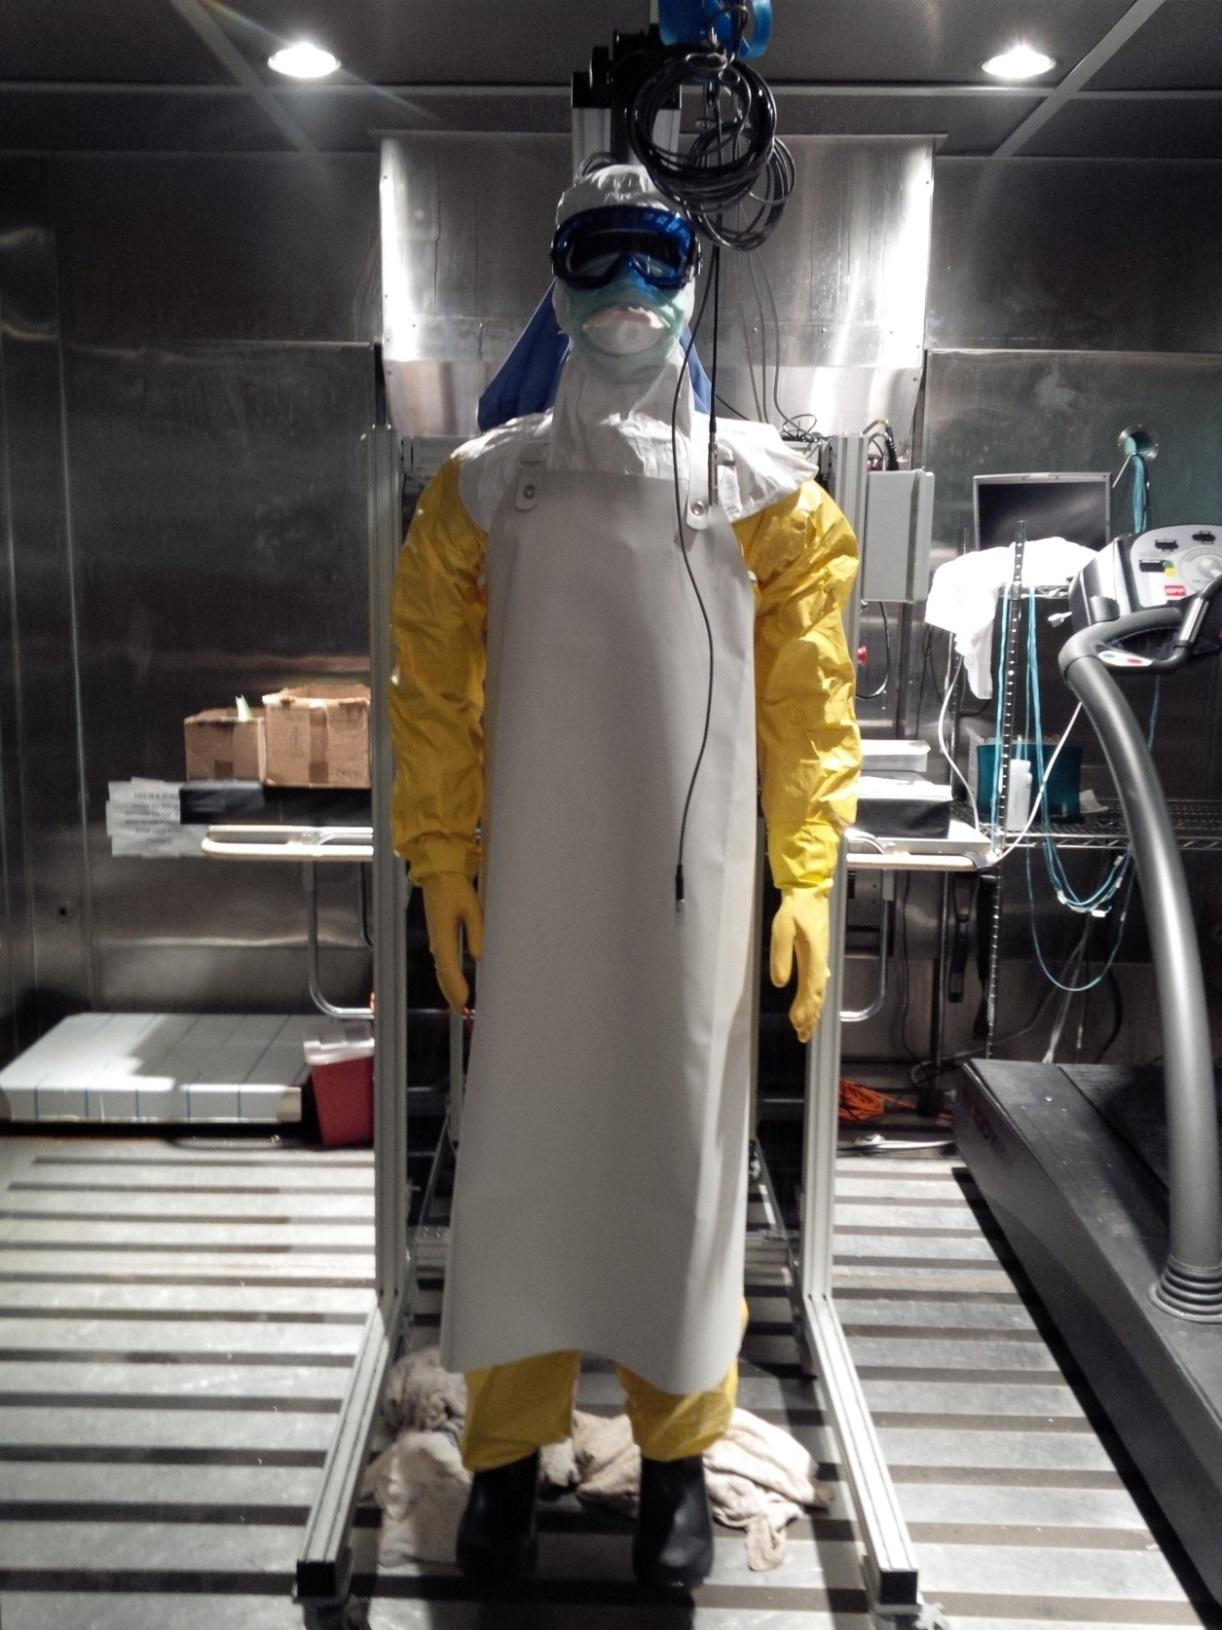

In [ ]:
import os
import glob
from PIL import Image

images = list(glob.glob(os.path.join(images_dir, '*.jpg')))
PIL.Image.open(images[0])


In [ ]:
labels_file = "/content/drive/MyDrive/data/label/label.lst"
df = pd.read_csv(labels_file, header=None, delimiter=" ", names=['image_name', 'face_id_in_images', 'face_box_left','face_box_right', 'face_box_bottom', 'face_box_cofidence', 'expression_label'])

In [ ]:
df.head()

image_name  face_id_in_images  face_box_left  \
angry_actor_104.jpg           0                 28            113   
angry_actor_109.jpg           0                 31            157   
angry_actor_120.jpg           1                 53             53   
angry_actor_13.jpg            0                 77             51   
angry_actor_132.jpg           0                 95             31   

                     face_box_right  face_box_bottom  face_box_cofidence  \
angry_actor_104.jpg             226              141             22.9362   
angry_actor_109.jpg             345              219             50.3056   
angry_actor_120.jpg             372              372             13.9434   
angry_actor_13.jpg              362              388             85.8104   
angry_actor_132.jpg             412              476             82.3948   

                     expression_label  
angry_actor_104.jpg                 0  
angry_actor_109.jpg                 0  
angry_actor_120.jpg                 2  
angry_actor_13.jpg                  3  
angry_actor_132.jpg                 0

In [ ]:
labels_names = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [ ]:
file_paths = df['image_name']
labels = df['expression_label']
list_ds = tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/Extracted_data/", '*/*'), shuffle=False)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
new_data_path='/content/drive/MyDrive/Emotions'
for lbl in labels_names:
  os.makedirs(os.path.join(new_data_path,lbl),exist_ok=True)

In [ ]:
import os
import cv2
import pandas as pd
from tqdm import tqdm

# we will create a mapper dictionary that maps labels to folder names
mapper = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'surprise',
    6: 'neutral'
}
origin_folder_path = "/content/drive/MyDrive/Extracted_data"
final_data_path = "/content/drive/MyDrive/Emotions"


for label in tqdm(df.expression_label.unique()):
    new_df = df[df.expression_label == label]
    folder_name = mapper[label]

    for image_name in new_df.image_name:  # Iterate over the filtered dataframe 'new_df'
        img = cv2.imread(os.path.join(origin_folder_path, str(image_name)))  # Convert image_name to string
        print(img)
        if img is not None:
            full_path = os.path.join(final_data_path, folder_name)
            full_path_with_name = os.path.join(full_path, image_name)  # Convert image_name to string
            cv2.imwrite(full_path_with_name, img)

